In [ ]:
from google.colab import files
import numpy as np
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols
from sklearn.linear_model import LinearRegression
import scipy.stats as st

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import io

In [ ]:
uploaded=files.upload()

Saving ToyotaCorolla.csv to ToyotaCorolla.csv


In [ ]:
for fn in uploaded.keys():
 print('file"{name}" length{length}'.format(name=fn,length=len(uploaded[fn])))
toyota=pd.read_csv(io.StringIO(uploaded['ToyotaCorolla.csv'].decode('utf-8')))

file"ToyotaCorolla.csv" length56688


In [ ]:
toyota.head()

,Price,Age,Mileage,FuelType,Horsepower,MetColor,Automatic,Displacement,Doors,Weight
0,16605,23,29196,Diesel,90,1,0,122,3,2568
1,16913,23,45321,Diesel,90,1,0,122,3,2568
2,17159,24,25918,Diesel,90,1,0,122,3,2568
3,18389,26,29826,Diesel,90,0,0,122,3,2568
4,16913,30,23923,Diesel,90,0,0,122,3,2579


**a. Which of the predictors are quantitative, and which are qualitative?**

In [ ]:
toyota.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Price         1436 non-null   int64 
 1   Age           1436 non-null   int64 
 2   Mileage       1436 non-null   int64 
 3   FuelType      1436 non-null   object
 4   Horsepower    1436 non-null   int64 
 5   MetColor      1436 non-null   int64 
 6   Automatic     1436 non-null   int64 
 7   Displacement  1436 non-null   int64 
 8   Doors         1436 non-null   int64 
 9   Weight        1436 non-null   int64 
dtypes: int64(9), object(1)
memory usage: 112.3+ KB


**Quantitative:**
*   Price
*   Age
*   Mileage
*   Horsepower
*   MetColor
*   Automatic
*   Displacement
*   Doors
*   Weight

**Qualitative:**
*   FuleType









**b. What is the range (i.e., min and max) of each quantitative predictor?**

In [ ]:
toyota.describe()

,Price,Age,Mileage,Horsepower,MetColor,Automatic,Displacement,Doors,Weight
count,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000
mean,13199.266017,55.947075,42584.589136,101.502089,0.674791,0.055710,95.720752,4.033426,2364.442897
std,4461.162081,18.599988,23305.402480,14.981080,0.468616,0.229441,11.587120,0.952677,115.945453
min,5351.000000,1.000000,1.000000,69.000000,0.000000,0.000000,79.000000,2.000000,2205.000000
25%,10394.000000,44.000000,26719.000000,90.000000,0.000000,0.000000,85.000000,3.000000,2293.000000
50%,12177.000000,61.000000,39388.500000,110.000000,1.000000,0.000000,98.000000,4.000000,2359.000000
75%,14699.000000,70.000000,54072.000000,110.000000,1.000000,0.000000,98.000000,5.000000,2392.000000
max,39975.000000,80.000000,150993.000000,192.000000,1.000000,1.000000,122.000000,5.000000,3560.000000


**c. What is the mean and standard deviation of each quantitative predictor?**

In [ ]:
toyota_mean=toyota.loc[:,"Price":"Weight"].mean(axis=0)
toyota_stdDev=toyota.loc[:,"Price":"Weight"].std(axis=0)
pd.DataFrame({"Mean":toyota_mean,"Standard Deviation":toyota_stdDev})

,Mean,Standard Deviation
Price,13199.266017,4461.162081
Age,55.947075,18.599988
Mileage,42584.589136,23305.402480
Horsepower,101.502089,14.981080
MetColor,0.674791,0.468616
Automatic,0.055710,0.229441
Displacement,95.720752,11.587120
Doors,4.033426,0.952677
Weight,2364.442897,115.945453


**d. Investigate the predictors graphically,  using scatterplots or other tools of your choice.Create some plots highlighting the relationships among the predictors.  Comment on your findings.**

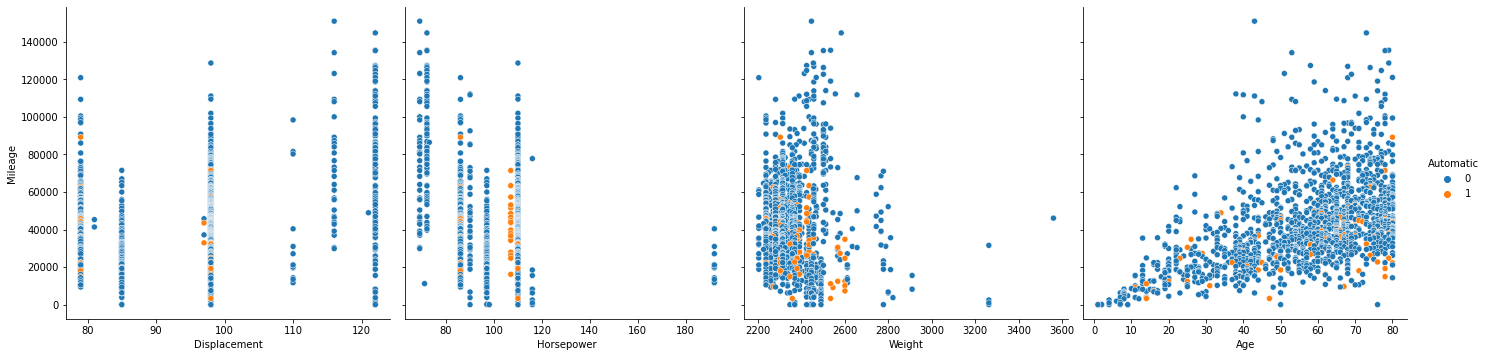

In [ ]:
graph = sns.pairplot(toyota, hue = "Automatic", y_vars = ["Mileage"], x_vars = ["Displacement", "Horsepower", "Weight", "Age"],
                height = 5)

We can see there is weak relation with Displacement,Horsepower and weight.
But have strong relation with age as increase in age mileage is also increasing.

**e. Suppose that we wish to predict gas mileage (mpg) on the basis of the other variables.Do your plots suggest that any of the other variables might be useful in predicting mpg?  Justifyyour answer.**

Based on the scatter plots in d. which relate Mileage to the predictors displacement, horsepower, weight and  age, it seems these factors would be  helpful in predicting mileage.

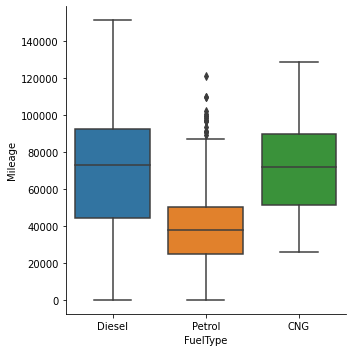

In [ ]:
mpgplot = sns.catplot(x = "FuelType", y = "Mileage", data = toyota, kind = "box")

Based on above box plot fuel type is also useful while prediction mileage.
petrol cars have comparatively less mileage than Diesel and CNG.
